In [1]:
# Libraries for reading and handling the data
import numpy as np
import pandas
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn 

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
df = pandas.read_csv('realfinal.csv')

df['Direct_X'] = df['Direct_X'].astype('int64')
df['Direct_X'] = df['Direct_X'].astype('object')

onehot_in = pandas.get_dummies(df[['Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire']])

df = pandas.concat([df, onehot_in], axis = 1)

df.drop(['Name', 'Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire', 'Max_Power'], axis = 1, inplace = True) 

X = df[['Core_Speed',	'L2_Cache',	'Memory',	'Memory_Bandwidth',	'Memory_Bus',	'Memory_Speed',	'Open_GL',	'Pixel_Rate',	'Process',	'ROPs',	'Shader',	'TMUs',	'Texture_Rate',	'Direct_X_9',	'Direct_X_10',	'Direct_X_11',	'Direct_X_12',	'Integrated_No',	'Integrated_Yes',	'Manufacturer_AMD',	'Manufacturer_ATI',	'Manufacturer_Intel',	'Manufacturer_Nvidia',	'Memory_Type_DDR',	'Memory_Type_DDR2',	'Memory_Type_DDR3',	'Memory_Type_GDDR2',	'Memory_Type_GDDR3',	'Memory_Type_GDDR4',	'Memory_Type_GDDR5',	'Memory_Type_GDDR5X',	'Memory_Type_HBM-1',	'Memory_Type_HBM-2',	'Memory_Type_eDRAM',	'SLI_Crossfire_No',	'SLI_Crossfire_Yes']]  # 독립변수
y = df['RMax_Power']

In [5]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [6]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=7)

In [7]:
#훈련 데이터
print(X_train.shape,y_train.shape)
print(y_train)

#테스트 데이터
print(X_test.shape, y_test.shape)
print(y_test)

(1409, 36) (1409,)
1210    200
1391    100
1266    300
369     600
484     300
       ... 
1603    400
502     300
537     200
1220    200
175     100
Name: RMax_Power, Length: 1409, dtype: int64
(604, 36) (604,)
1261    200
140     100
110     100
259     100
1804    300
       ... 
1954    100
464     300
1550    100
458     100
1375    200
Name: RMax_Power, Length: 604, dtype: int64


머신러닝 모델 구축 - 1) LogisticRegression

In [8]:
log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
# 정확도 확인
print('Train data Score: ', log_reg.score(X_train, y_train))
print('Test data Score: ', log_reg.score(X_test, y_test))

Train data Score:  0.8573456352022711
Test data Score:  0.8559602649006622


머신러닝 모델 구축 - 2) Decision Tree

In [10]:
tree = DecisionTreeClassifier(max_depth = 10,
                              min_samples_leaf = 20,
                              min_samples_split = 40).fit(X_train, y_train)

In [11]:
# 정확도 확인
print('Train data Score: ', tree.score(X_train, y_train))
print('Test data Score: ', tree.score(X_test, y_test))

Train data Score:  0.8616039744499645
Test data Score:  0.8625827814569537


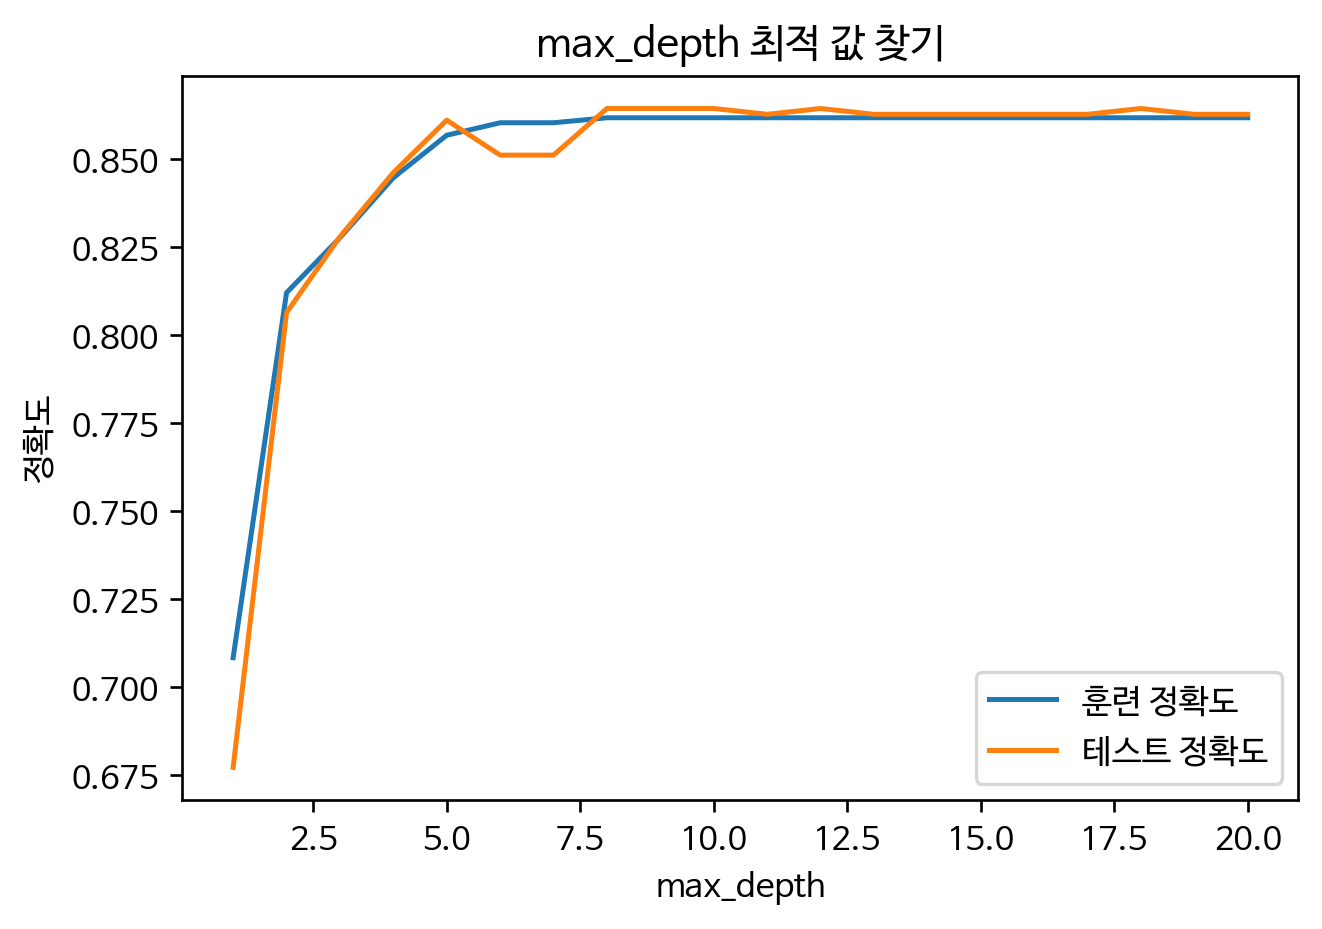

In [12]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 1 에서 20 까지 max_depth 를 적용
max_depth_settings = range(1, 21)

for max_depth in max_depth_settings:
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth = max_depth,
                              min_samples_leaf = 20,
                              min_samples_split = 40)
    tree.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tree.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tree.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('max_depth 최적 값 찾기')
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("max_depth")
plt.legend()
plt.show()

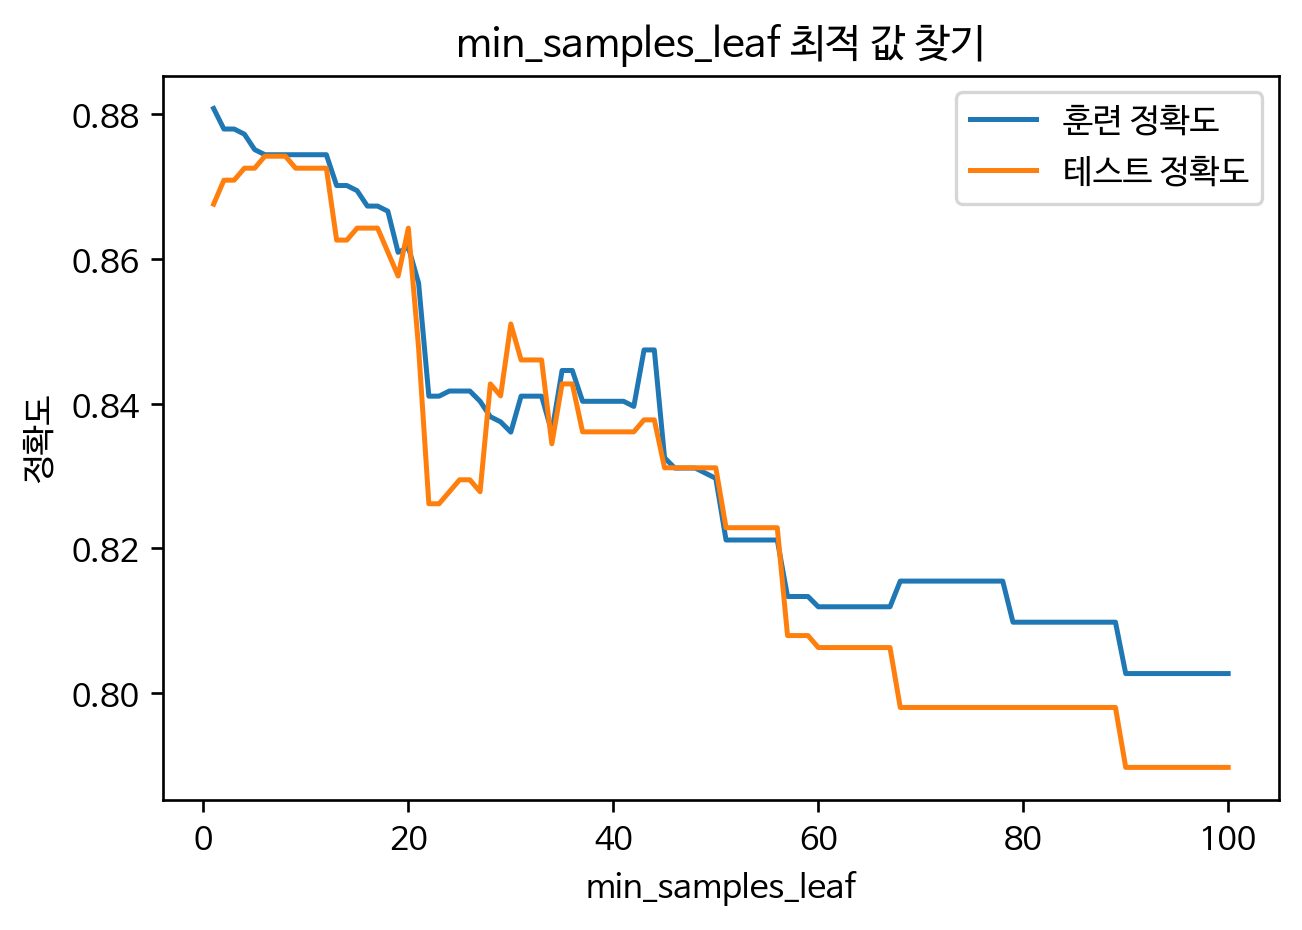

In [13]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 1 에서 100 까지 min_samples_leaf 를 적용
min_samples_leaf_settings = range(1, 101)

for min_samples_leaf in min_samples_leaf_settings:
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth = 10,
                              min_samples_leaf = min_samples_leaf,
                              min_samples_split = 40)
    tree.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tree.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tree.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('min_samples_leaf 최적 값 찾기')
plt.plot(min_samples_leaf_settings, training_accuracy, label="훈련 정확도")
plt.plot(min_samples_leaf_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("min_samples_leaf")
plt.legend()
plt.show()

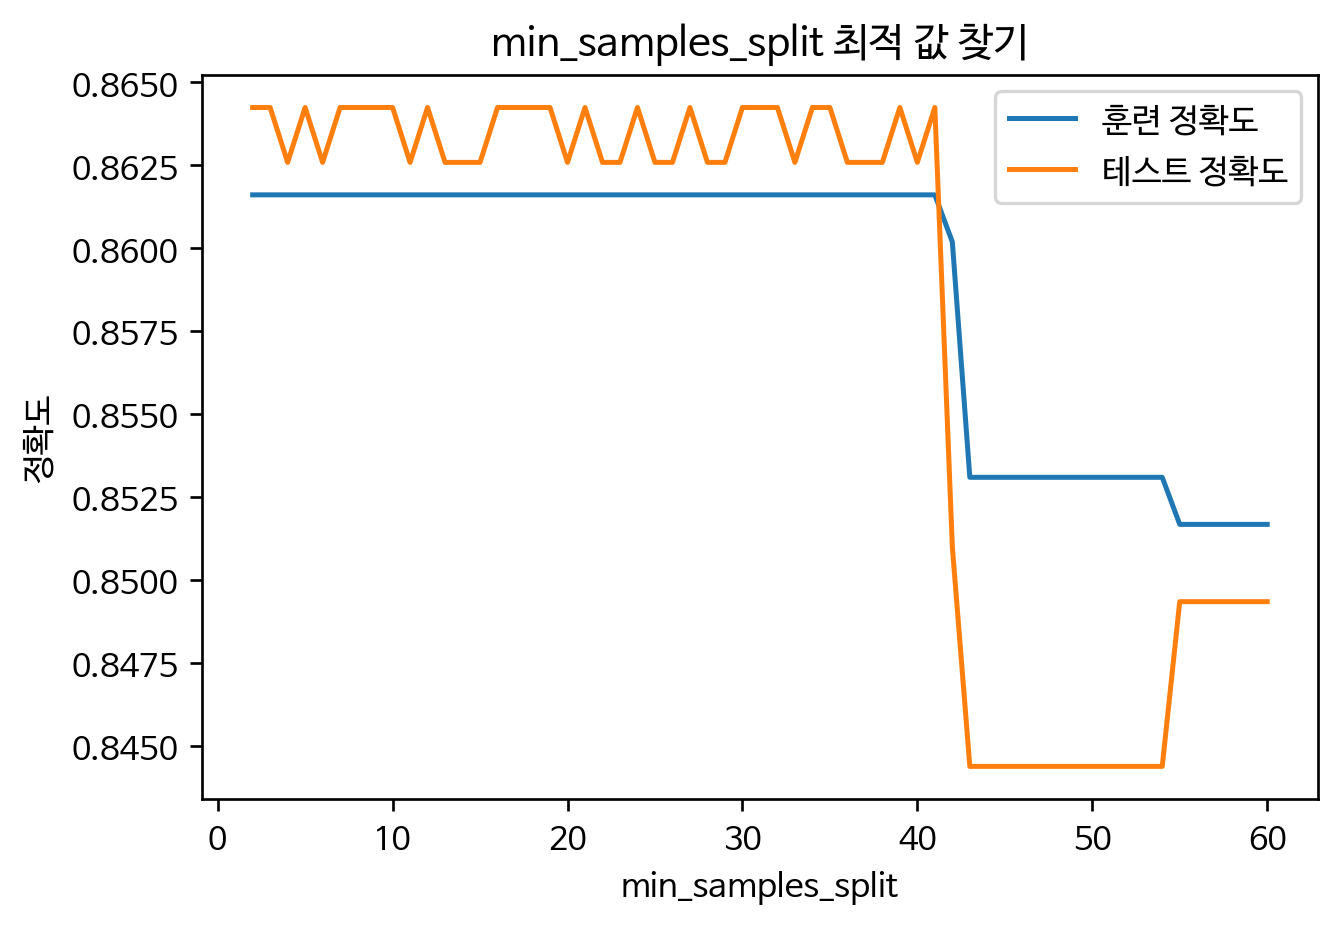

In [14]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 2 에서 60 까지 max_depth 를 적용
min_samples_split_settings = range(2, 61)

for min_samples_split in min_samples_split_settings:
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth = 10,
                              min_samples_leaf = 20,
                              min_samples_split = min_samples_split)
    tree.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tree.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tree.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('min_samples_split 최적 값 찾기')
plt.plot(min_samples_split_settings, training_accuracy, label="훈련 정확도")
plt.plot(min_samples_split_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("min_samples_split")
plt.legend()
plt.show()

머신러닝 모델 구축 - 3) GradientBoostingClassifier

In [15]:
boost = GradientBoostingClassifier(max_depth = 5,
                                  learning_rate = 0.01).fit(X_train, y_train)

In [16]:
# 정확도 확인
print('Train data Score: ', boost.score(X_train, y_train))
print('Test data Score: ', boost.score(X_test, y_test))

Train data Score:  0.9616749467707594
Test data Score:  0.8990066225165563


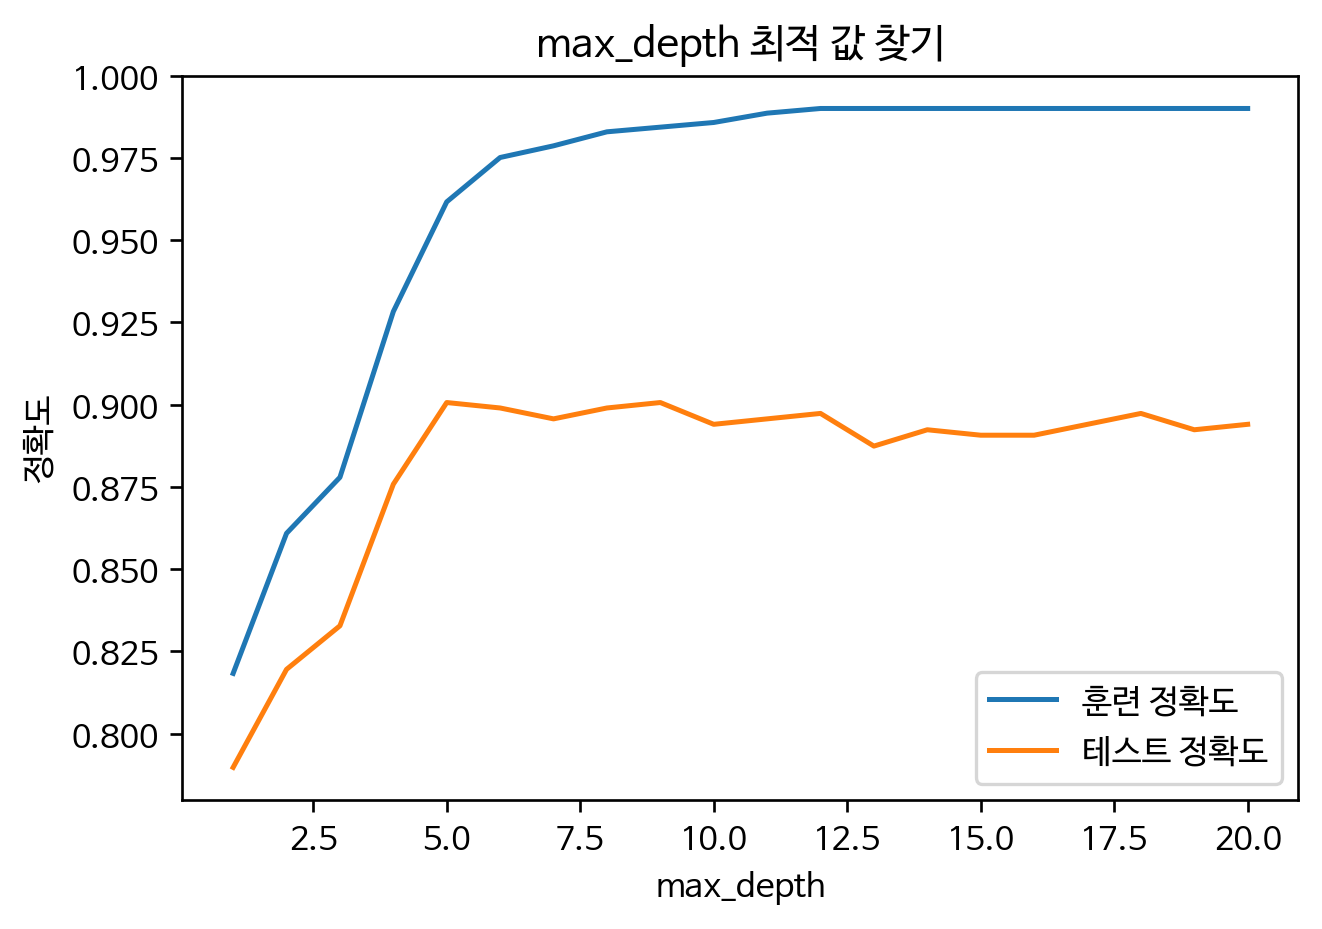

In [17]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 1 에서 20 까지 max_depth 를 적용
max_depth_settings = range(1, 21)

for max_depth in max_depth_settings:
    # 모델 생성
    boost = GradientBoostingClassifier(max_depth = max_depth,
                                  learning_rate = 0.01)
    boost.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(boost.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(boost.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('max_depth 최적 값 찾기')
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("max_depth")
plt.legend()
plt.show()

머신러닝 모델 구축 - 4) RandomForestClassifier

In [18]:
random = RandomForestClassifier(n_estimators = 300,
                                random_state = 0).fit(X_train, y_train)

In [19]:
# 정확도 확인
print('Train data Score: ', random.score(X_train, y_train))
print('Test data Score: ', random.score(X_test, y_test))

Train data Score:  0.9900638750887154
Test data Score:  0.9139072847682119


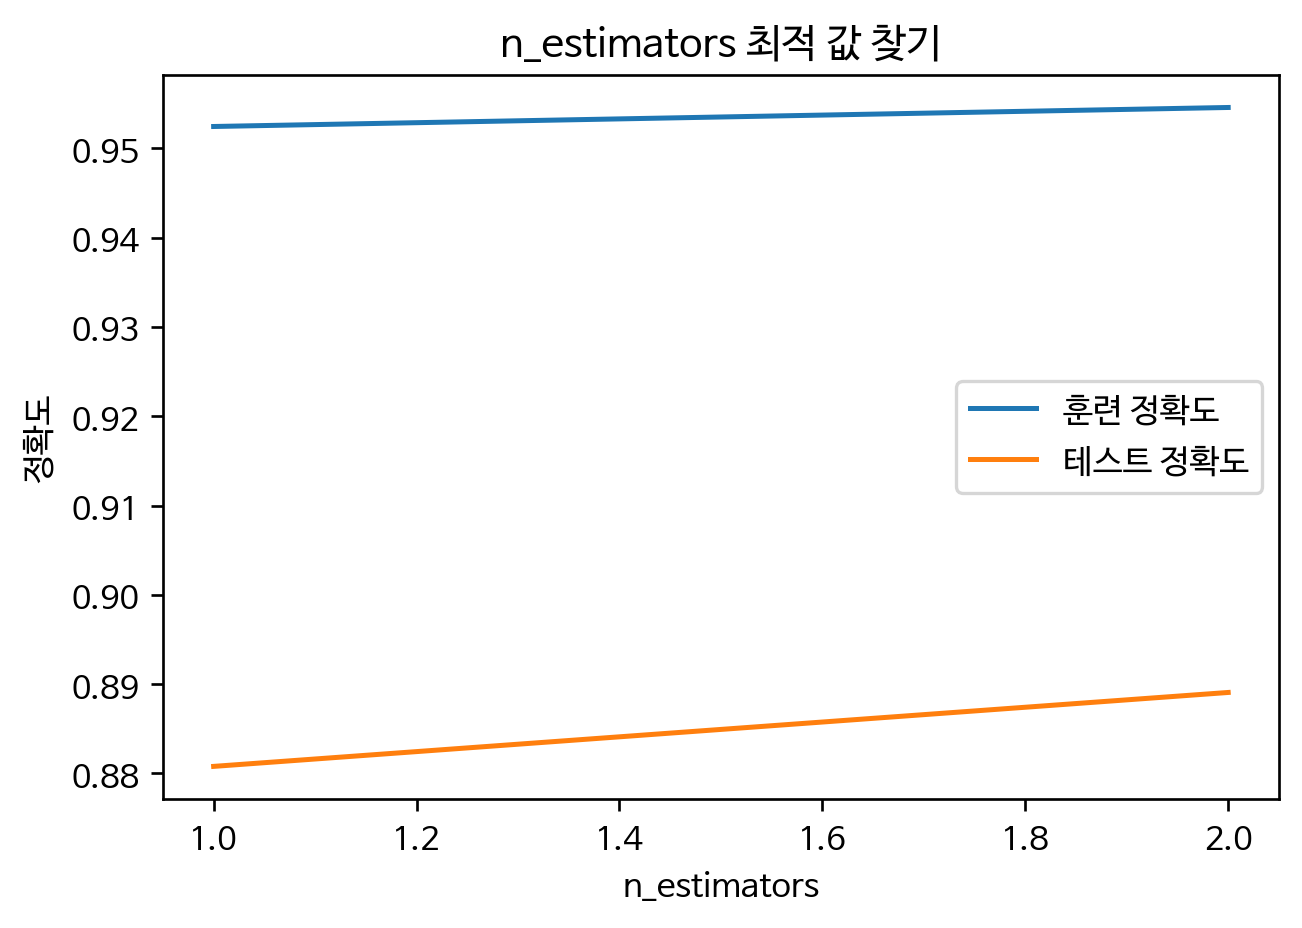

In [25]:
training_accuracy = []
test_accuracy = []
# 1 에서 500 까지 n_estimators 를 적용
n_estimators_settings = range(1, 3)

for n_estimators in n_estimators_settings:
    # 모델 생성
    random = RandomForestClassifier(n_estimators = n_estimators, random_state = 0)
    random.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(random.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(random.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('n_estimators 최적 값 찾기')
plt.plot(n_estimators_settings, training_accuracy, label="훈련 정확도")
plt.plot(n_estimators_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

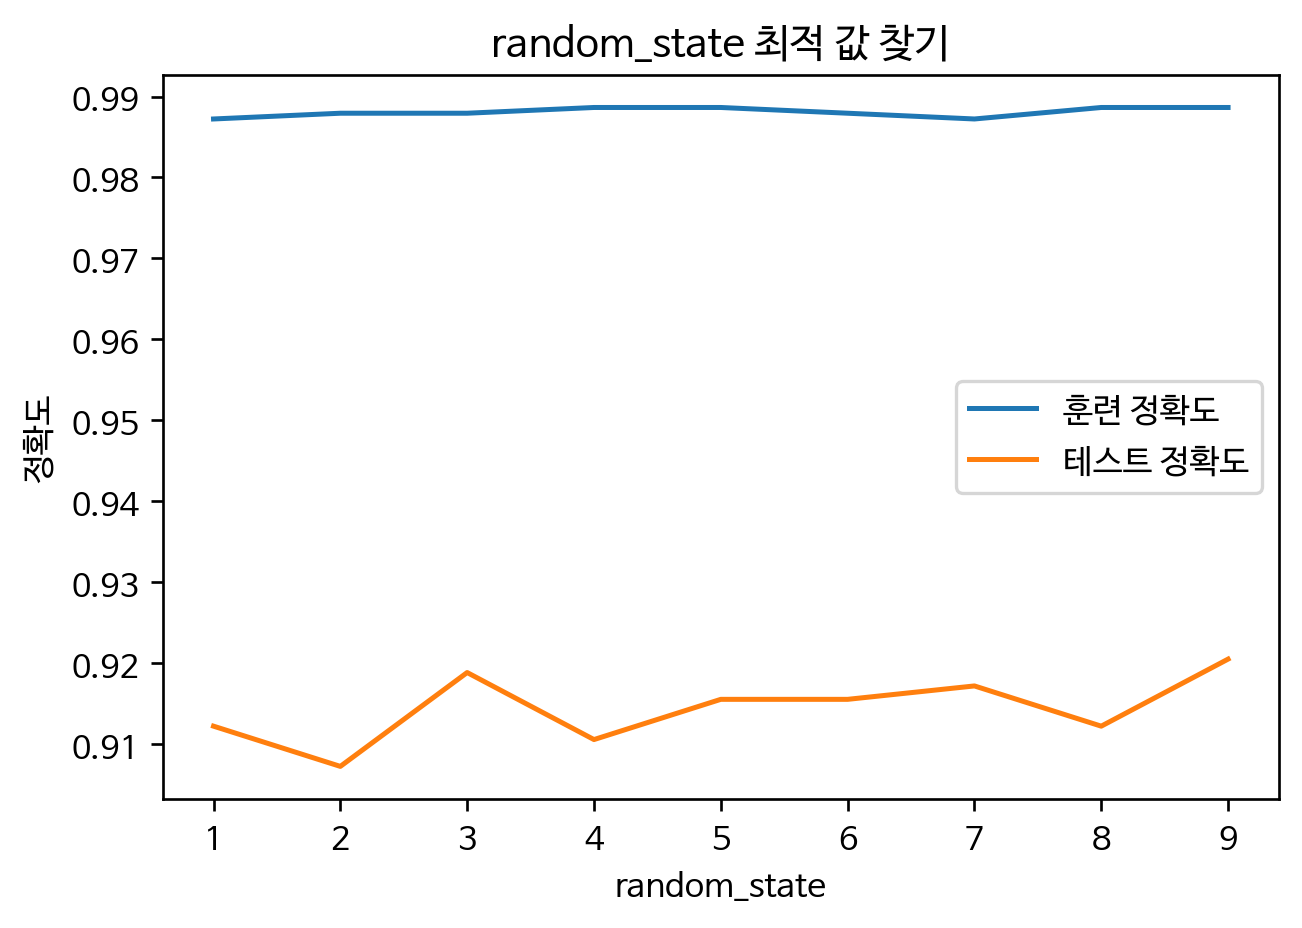

In [27]:
training_accuracy = []
test_accuracy = []
# 1 에서 100 까지 random_state 를 적용
random_state_settings = range(1, 10)

for random_state in random_state_settings:
    # 모델 생성
    random = RandomForestClassifier(n_estimators = 20, random_state = random_state)
    random.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(random.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(random.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('random_state 최적 값 찾기')
plt.plot(random_state_settings, training_accuracy, label="훈련 정확도")
plt.plot(random_state_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("random_state")
plt.legend()
plt.show()

In [28]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)

Logistic Regression 평가 지표
              precision    recall  f1-score   support

         100       0.94      0.94      0.94       251
         200       0.82      0.90      0.86       207
         300       0.86      0.74      0.80       112
         400       0.31      0.29      0.30        17
         500       0.57      0.40      0.47        10
         600       0.33      0.33      0.33         6
         800       0.00      0.00      0.00         1

    accuracy                           0.86       604
   macro avg       0.55      0.52      0.53       604
weighted avg       0.85      0.86      0.85       604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Decision Tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('Decision Tree 평가 지표')
print(tree_report)

Decision Tree 평가 지표
              precision    recall  f1-score   support

         100       0.89      0.97      0.93       251
         200       0.85      0.83      0.84       207
         300       0.81      0.80      0.81       112
         400       0.00      0.00      0.00        17
         500       0.40      0.80      0.53        10
         600       0.00      0.00      0.00         6
         800       0.00      0.00      0.00         1

    accuracy                           0.85       604
   macro avg       0.42      0.49      0.44       604
weighted avg       0.82      0.85      0.83       604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# GradientBoostingClassifie 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('GradientBoostingClassifie 평가 지표')
print(boost_report)

GradientBoostingClassifie 평가 지표
              precision    recall  f1-score   support

         100       0.98      0.96      0.97       251
         200       0.87      0.94      0.90       207
         300       0.88      0.84      0.86       112
         400       0.18      0.12      0.14        17
         500       0.64      0.70      0.67        10
         600       0.00      0.00      0.00         6
         700       0.00      0.00      0.00         0
         800       0.50      1.00      0.67         1

    accuracy                           0.89       604
   macro avg       0.50      0.57      0.53       604
weighted avg       0.88      0.89      0.89       604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# RandomForestClassifier 평가 지표
random_y_hat = random.predict(X_test)
random_report = metrics.classification_report(y_test, random_y_hat)
print('RandomForestClassifier 평가 지표')
print(random_report)

RandomForestClassifier 평가 지표
              precision    recall  f1-score   support

         100       0.97      0.98      0.97       251
         200       0.91      0.95      0.93       207
         300       0.90      0.88      0.89       112
         400       0.50      0.35      0.41        17
         500       0.82      0.90      0.86        10
         600       0.50      0.33      0.40         6
         800       0.00      0.00      0.00         1

    accuracy                           0.92       604
   macro avg       0.66      0.63      0.64       604
weighted avg       0.92      0.92      0.92       604



In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 다항회귀분석 모형 객체 생성 후 학습시키기
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
r_square = lr.score(X_test, y_test)
r_square

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값을 y_hat으로 담기
y_hat = lr.predict(X)

In [ ]:
# 모형에 테스트셋 X_test 데이터를 입력하여 예측한 값을 y_hat_test으로 담기
y_hat_test = lr.predict(X_test)

In [ ]:
# train 데이터(X_train)의 산점도와 test 데이터(X_test)로 예측한 (y_hat_test) 회귀선을 그래프로 출력

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')  # 데이터의 분포
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')  # 모형이 예측한 회귀선
ax.legend(loc = 'best')
plt.xlabel('features')
plt.ylabel('mpg')
plt.show()